# CSCI2000U — Assignment 1  
## Analyzing AI-Related Organizational Changes Across Canadian Industries (2025)  
**Name:** Nehal Huda ---
**Student ID:** 100968173


## Introduction

Businesses in a variety of industries starting to utilize artificial intelligence (AI) much more attention, and they are also starting to plan how they will introduce AI in the future. **Statistics Canada** provided a public dataset for this project, named *"Use of artificial intelligence (AI) by businesses or organizations in producing goods or delivering services over the next 12 months, third quarter of 2025."* It includes survey results which showcase how different Canadian industries expect to change their workplace and methods as they begin to use AI.

This dataset reports the percentage of companies that want to implement specific AI-related changed, split by industry and category. A few examples include, training current employees, hiring AI experts and buying cloud computing services. The dataset allows us to explore how different sectors in the Canadian economy plan to prepare for the future in AI.

After exploring the dataset, 2 questions which I had were:

1. **Which industries plan to train their staff the most when adopting AI?**  
2. **Which AI-related changes are most common across industries in Canada?**  

These questions are important because workplaces require both technical advancement and preperation in general. Knowing how different industries plan to adapt can help identify which sectors will have a larger shift and change, whilst exploring whether businesses prefer internal development or extra investments. This EDA project will discover these trends using descriptive values/stats and visualizations to find a conclusion in how Canadian industries expect AI to influence their workplace over coming year.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("default")
sns.set_theme()


In [2]:
df = pd.read_csv("33101048 (1).csv") #Provide the csv file to begin the process
df.head() # Print out the first 5 rows of the dataframe to get an idea of the data structure

,REF_DATE,GEO,DGUID,Business characteristics,Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2025,Canada,2021A000011124,North American Industry Classification System ...,Train current staff to use artificial intellig...,Percent,239,units,0,v1775199489,1.1.1,49.8,B,NaN,NaN,1
1,2025,Canada,2021A000011124,North American Industry Classification System ...,Hire staff trained in artificial intelligence ...,Percent,239,units,0,v1775199491,1.1.2,12.6,A,NaN,NaN,1
2,2025,Canada,2021A000011124,North American Industry Classification System ...,Purchase computing power or specialized equipment,Percent,239,units,0,v1775199492,1.1.3,14.2,A,NaN,NaN,1
3,2025,Canada,2021A000011124,North American Industry Classification System ...,Purchase cloud services or cloud storage,Percent,239,units,0,v1775199493,1.1.4,27.0,B,NaN,NaN,1
4,2025,Canada,2021A000011124,North American Industry Classification System ...,Change data collection or data management prac...,Percent,239,units,0,v1775199494,1.1.5,25.6,B,NaN,NaN,1


In [3]:
df = df.rename(columns={
    "Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services": "AI_Change"
}) #The name of this column is way too long, so we rename it to make it easier for the future
df.columns # Display the column to confirm the change has worked


Index(['REF_DATE', 'GEO', 'DGUID', 'Business characteristics', 'AI_Change',
       'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
       'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [4]:
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce') # Converting the VALUE column to numbers and turning invalid values to NaN
df['VALUE'].describe() #Show the basic stats for the VALUE column

count    6339.000000
mean       16.826755
std        27.259996
min         0.000000
25%         0.000000
50%         5.000000
75%        19.000000
max       100.000000
Name: VALUE, dtype: float64

## Exploratory Data Analysis (EDA)

In this section, the dataset’s structure gets manipulated and examined, which includes data types, missing values, and descriptive statistics. This helps the data get prepared for exploration later.


In [5]:
df.info() #Show column names, data types and the non-null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   REF_DATE                  9380 non-null   int64  
 1   GEO                       9380 non-null   object 
 2   DGUID                     9380 non-null   object 
 3   Business characteristics  9380 non-null   object 
 4   AI_Change                 9380 non-null   object 
 5   UOM                       9380 non-null   object 
 6   UOM_ID                    9380 non-null   int64  
 7   SCALAR_FACTOR             9380 non-null   object 
 8   SCALAR_ID                 9380 non-null   int64  
 9   VECTOR                    9380 non-null   object 
 10  COORDINATE                9380 non-null   object 
 11  VALUE                     6339 non-null   float64
 12  STATUS                    9380 non-null   object 
 13  SYMBOL                    0 non-null      float64
 14  TERMINAT

In [6]:
df.isna().mean().sort_values(ascending=False) # Calculate and display the percentage of missing values in each column, from greatest to least 

SYMBOL                      1.0000
TERMINATED                  1.0000
VALUE                       0.3242
REF_DATE                    0.0000
AI_Change                   0.0000
GEO                         0.0000
DGUID                       0.0000
Business characteristics    0.0000
SCALAR_FACTOR               0.0000
UOM_ID                      0.0000
UOM                         0.0000
SCALAR_ID                   0.0000
COORDINATE                  0.0000
VECTOR                      0.0000
STATUS                      0.0000
DECIMALS                    0.0000
dtype: float64

In [7]:
df['VALUE'].describe() # Display summary stats for the VALUE column

count    6339.000000
mean       16.826755
std        27.259996
min         0.000000
25%         0.000000
50%         5.000000
75%        19.000000
max       100.000000
Name: VALUE, dtype: float64

## Question 1  
### Which industries plan to train their staff the most when adopting AI?


In [8]:
train_df = df[df['AI_Change'] == "Train current staff to use artificial intelligence (AI)"] # Filter the data to only include rows where the AI change is "Train current staff to use artificial intelligence (AI)"
train_df.head() # Display the first 5 rows of the modified dataframe

,REF_DATE,GEO,DGUID,Business characteristics,AI_Change,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2025,Canada,2021A000011124,North American Industry Classification System ...,Train current staff to use artificial intellig...,Percent,239,units,0,v1775199489,1.1.1,49.8,B,NaN,NaN,1
10,2025,Canada,2021A000011124,"Agriculture, forestry, fishing and hunting [11]",Train current staff to use artificial intellig...,Percent,239,units,0,v1775199599,1.2.1,78.3,E,NaN,NaN,1
20,2025,Canada,2021A000011124,"Mining, quarrying, and oil and gas extraction ...",Train current staff to use artificial intellig...,Percent,239,units,0,v1775199709,1.3.1,88.1,C,NaN,NaN,1
30,2025,Canada,2021A000011124,Construction [23],Train current staff to use artificial intellig...,Percent,239,units,0,v1775199819,1.4.1,74.2,E,NaN,NaN,1
40,2025,Canada,2021A000011124,Manufacturing [31-33],Train current staff to use artificial intellig...,Percent,239,units,0,v1775199929,1.5.1,55.4,E,NaN,NaN,1


In [9]:
train_sorted = train_df[['Business characteristics', 'VALUE']].sort_values(by="VALUE", ascending=False) 
#Select only the industries and their corresponding VALUEs, then sort them in greatest to least order based on VALUE
train_sorted # Display the modified dataframe


,Business characteristics,VALUE
8410,"Majority ownership, woman",100.0
9210,"Ownership by visible minority, Southeast Asian",100.0
9140,"Ownership by visible minority, all visible min...",100.0
8330,"Age of business or organization, 2 years or less",100.0
8420,"Majority ownership, First Nations, Métis or Inuit",100.0
...,...,...
9310,Sold goods to businesses in Canada who then re...,NaN
9340,Relocated any business or organizational activ...,NaN
9350,Relocated any business or organizational activ...,NaN
9360,Engaged in other international business activi...,NaN


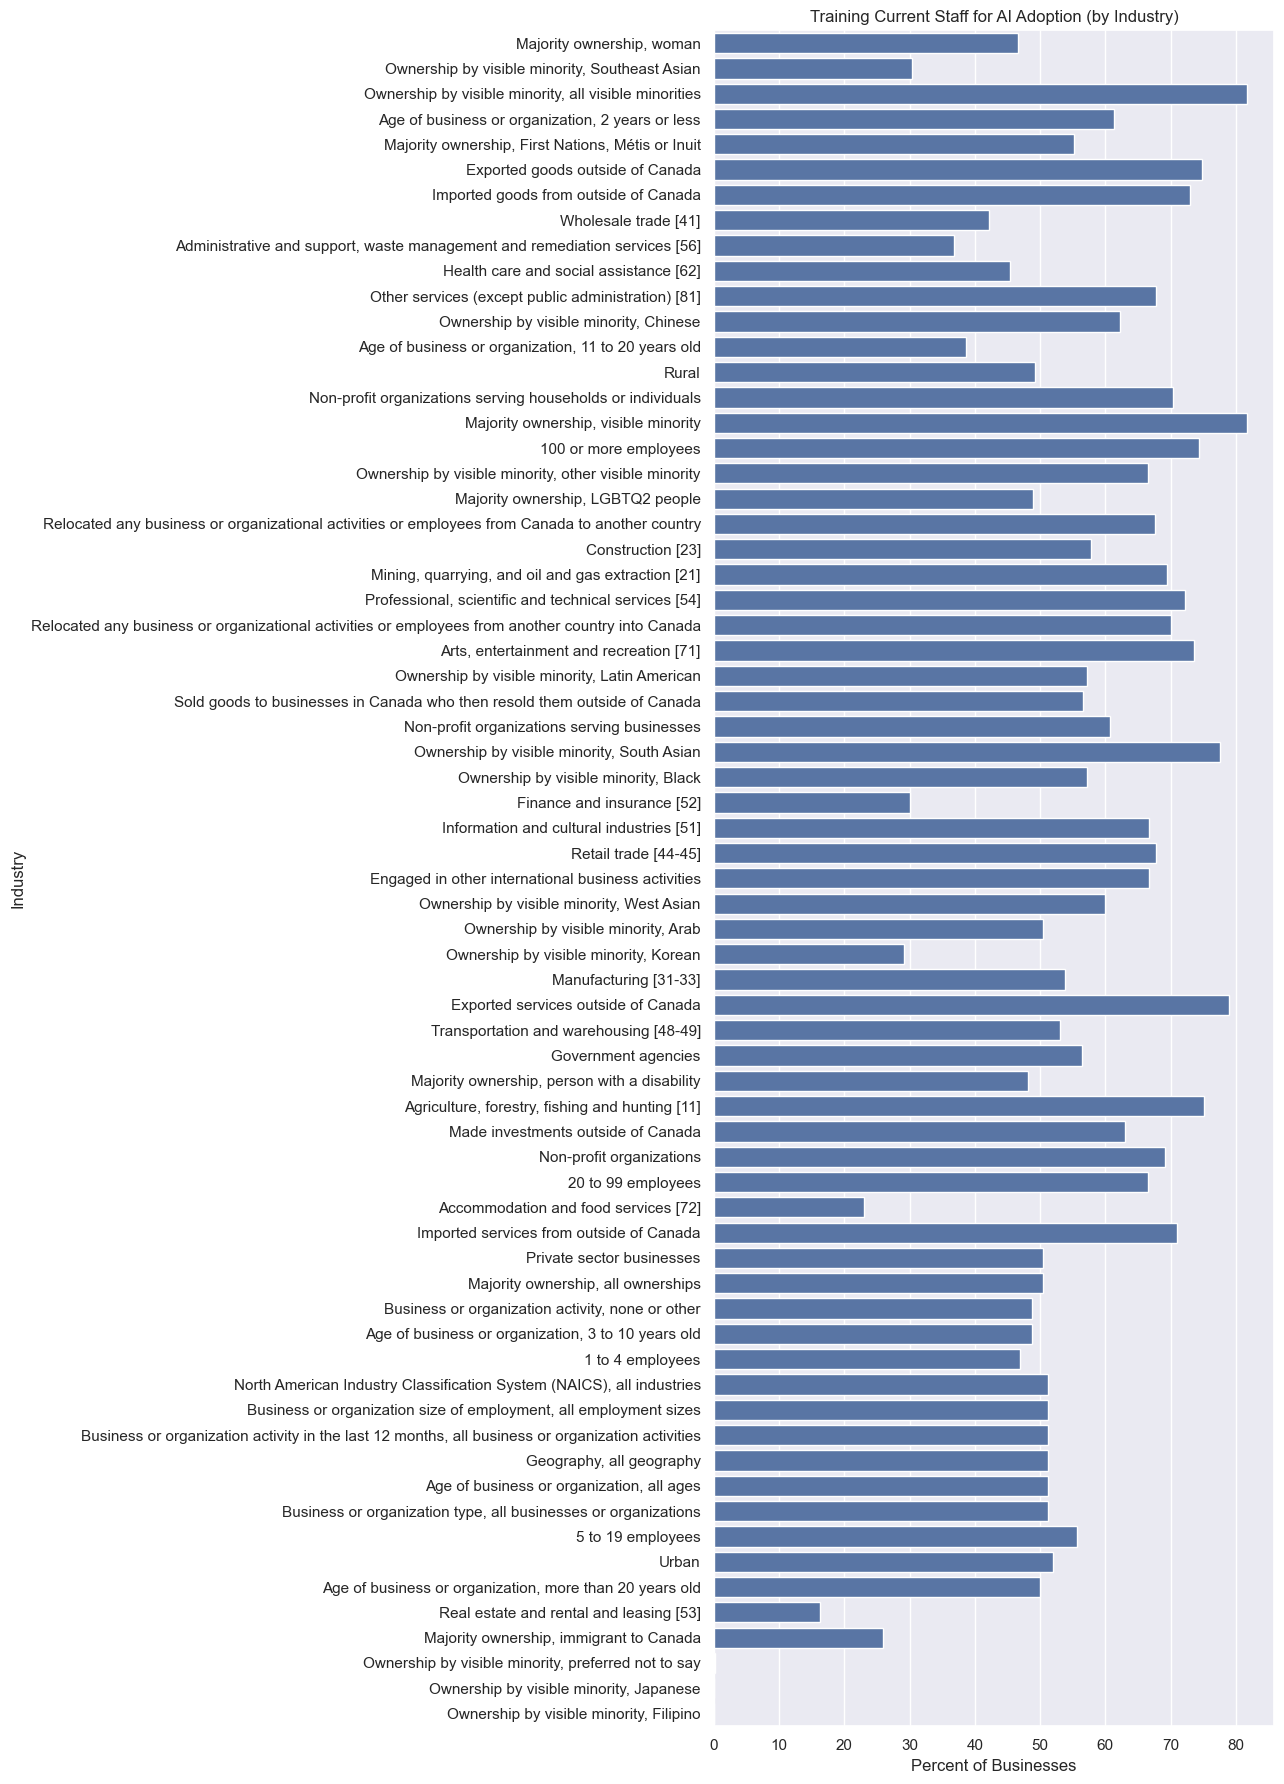

In [10]:
plt.figure(figsize=(13, 18))
sns.barplot(
    data=train_sorted,
    x='VALUE',
    y='Business characteristics',
    errorbar=None
)
plt.xlabel("Percent of Businesses")
plt.ylabel("Industry")
plt.title("Training Current Staff for AI Adoption (by Industry)")
plt.tight_layout()
plt.show()

# This bar plot visualizes the percentage of businesses in different industries that favour training their current staff for AI adoption.



## Question 2  
### Which AI-related changes are most common across all industries?


In [11]:
changes_mean = df.groupby("AI_Change")['VALUE'].mean().sort_values(ascending=False) 
# Calculate the mean VALUE for each AI_Change category and sort them from greatest to least
changes_mean #Display the results

AI_Change
Train current staff to use artificial intelligence (AI)                                                                                  54.799606
Develop new workflows                                                                                                                    42.405803
Change data collection or data management practices                                                                                      19.901990
Purchase cloud services or cloud storage                                                                                                 17.415854
Purchase computing power or specialized equipment                                                                                        12.746875
Use vendors or consulting services to install or integrate artificial intelligence (AI)                                                  12.120000
Hire staff trained in artificial intelligence (AI)                                                          

C:\Users\MoCEE Builds\AppData\Local\Temp\ipykernel_2892\514596336.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


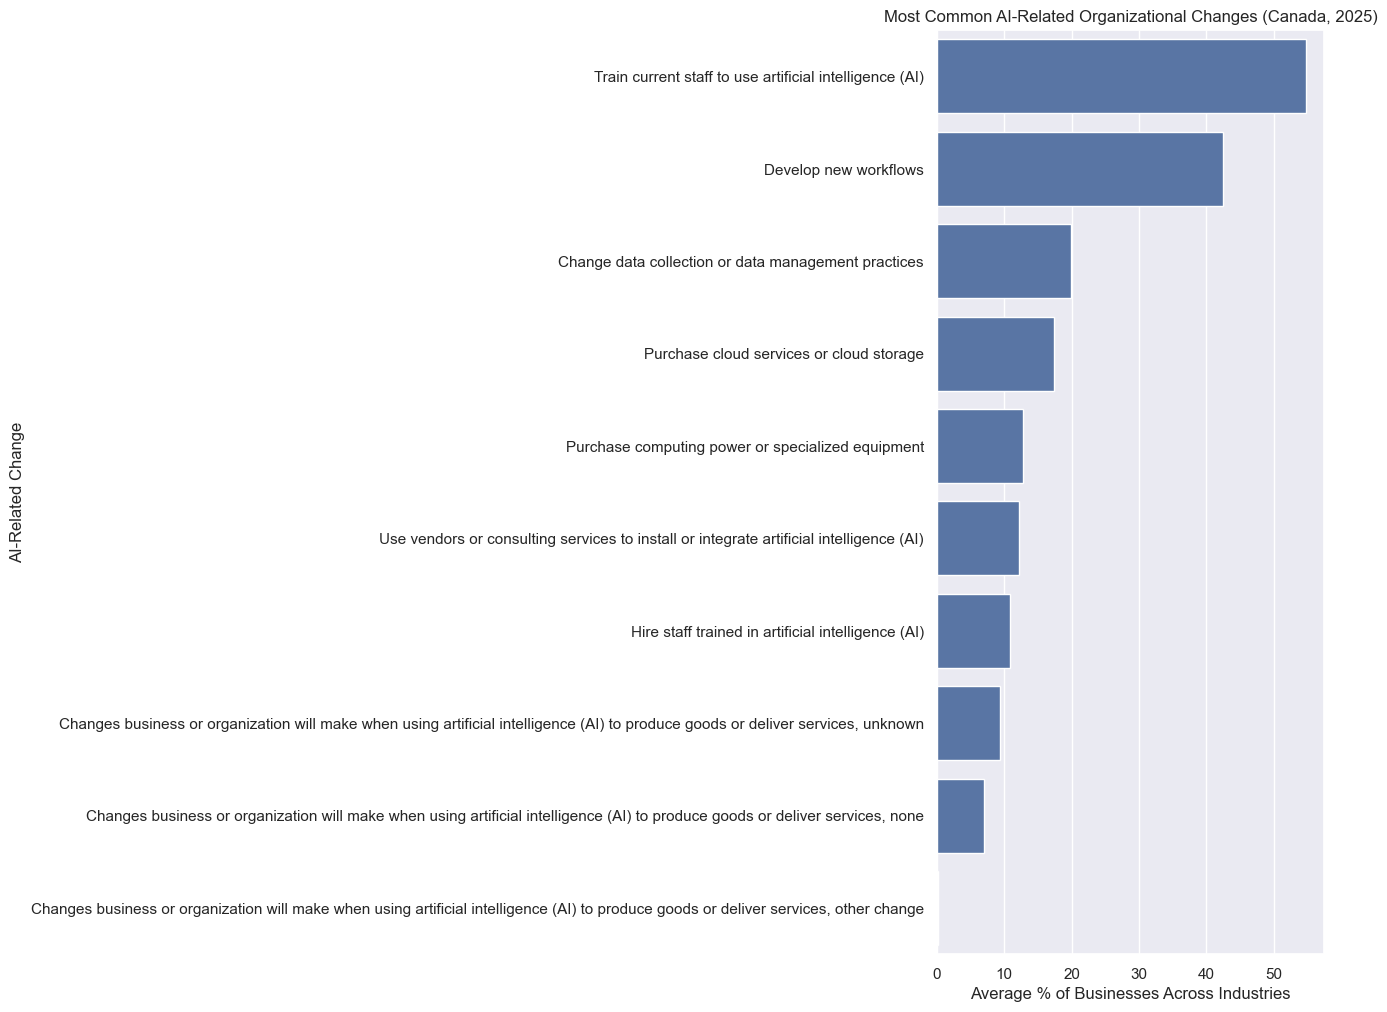

In [12]:
plt.figure(figsize=(5, 12))
sns.barplot (
    x=changes_mean.values,
    y=changes_mean.index,
    errorbar=None
)
plt.xlabel("Average % of Businesses Across Industries")
plt.ylabel("AI-Related Change")
plt.title("Most Common AI-Related Organizational Changes (Canada, 2025)")
plt.tight_layout()
plt.show()
#This bar plot shows which AI-related organizational changes are most common across industries in Canada for 2025.



## Multi-Key Grouping
Just as an additional section, I want to utilize the multi-key groupby operation to find the average VALUE for each combination of both AI change and industry.

In [13]:
#Create a table that shows the average VALUE for each combination of Business characteristics and AI_Change
multi = df.groupby(['Business characteristics', 'AI_Change'])['VALUE'].mean().reset_index()
multi.head().style.format({"VALUE": "{:.4f}"}) #Display the first 5 rows of the new dataframe

,Business characteristics,AI_Change,VALUE
0,1 to 4 employees,Change data collection or data management practices,17.4571
1,1 to 4 employees,"Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, none",10.9846
2,1 to 4 employees,"Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, other change",0.0000
3,1 to 4 employees,"Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, unknown",14.7846
4,1 to 4 employees,Develop new workflows,36.2182


In [14]:
# Pivot the table to show Business characteristics as rows and AI_Change as columns
pivot = multi.pivot(index='Business characteristics', columns='AI_Change', values='VALUE')

#Display the pivot table
pivot.style.format("{:.4f}")

AI_Change,Change data collection or data management practices,"Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, none","Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, other change","Changes business or organization will make when using artificial intelligence (AI) to produce goods or deliver services, unknown",Develop new workflows,Hire staff trained in artificial intelligence (AI),Purchase cloud services or cloud storage,Purchase computing power or specialized equipment,Train current staff to use artificial intelligence (AI),Use vendors or consulting services to install or integrate artificial intelligence (AI)
Business characteristics,,,,,,,,,,
1 to 4 employees,17.4571,10.9846,0.0000,14.7846,36.2182,12.6462,19.7929,17.0333,46.9417,10.7214
100 or more employees,22.2600,5.0273,0.2455,8.6125,31.7750,15.9429,15.8000,12.0100,74.3200,18.3111
20 to 99 employees,32.3818,6.4462,0.4769,8.5154,54.2125,11.8000,15.9200,10.6909,66.6000,10.2923
5 to 19 employees,17.5923,11.1769,0.0000,11.0571,49.5636,8.7923,20.3364,9.9615,55.5778,11.7167
Accommodation and food services [72],21.2125,6.1333,0.0273,6.6000,19.4429,5.2273,3.9222,2.2333,22.9375,4.0889
"Administrative and support, waste management and remediation services [56]",24.1800,1.9667,0.0000,13.1500,44.4400,2.9333,21.8200,1.4182,36.7714,15.7273
"Age of business or organization, 11 to 20 years old",14.6917,5.8643,0.3786,20.9077,36.6400,7.6071,14.3444,8.6455,38.7000,10.9000
"Age of business or organization, 2 years or less",37.9571,4.8545,0.0000,2.4182,48.0000,14.7250,13.3889,1.3545,61.2571,1.4091
"Age of business or organization, 3 to 10 years old",16.5929,10.5083,0.0000,10.4077,51.2000,7.4154,20.4833,17.1364,48.8000,12.4000


C:\Users\MoCEE Builds\AppData\Local\Temp\ipykernel_2892\3659428535.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


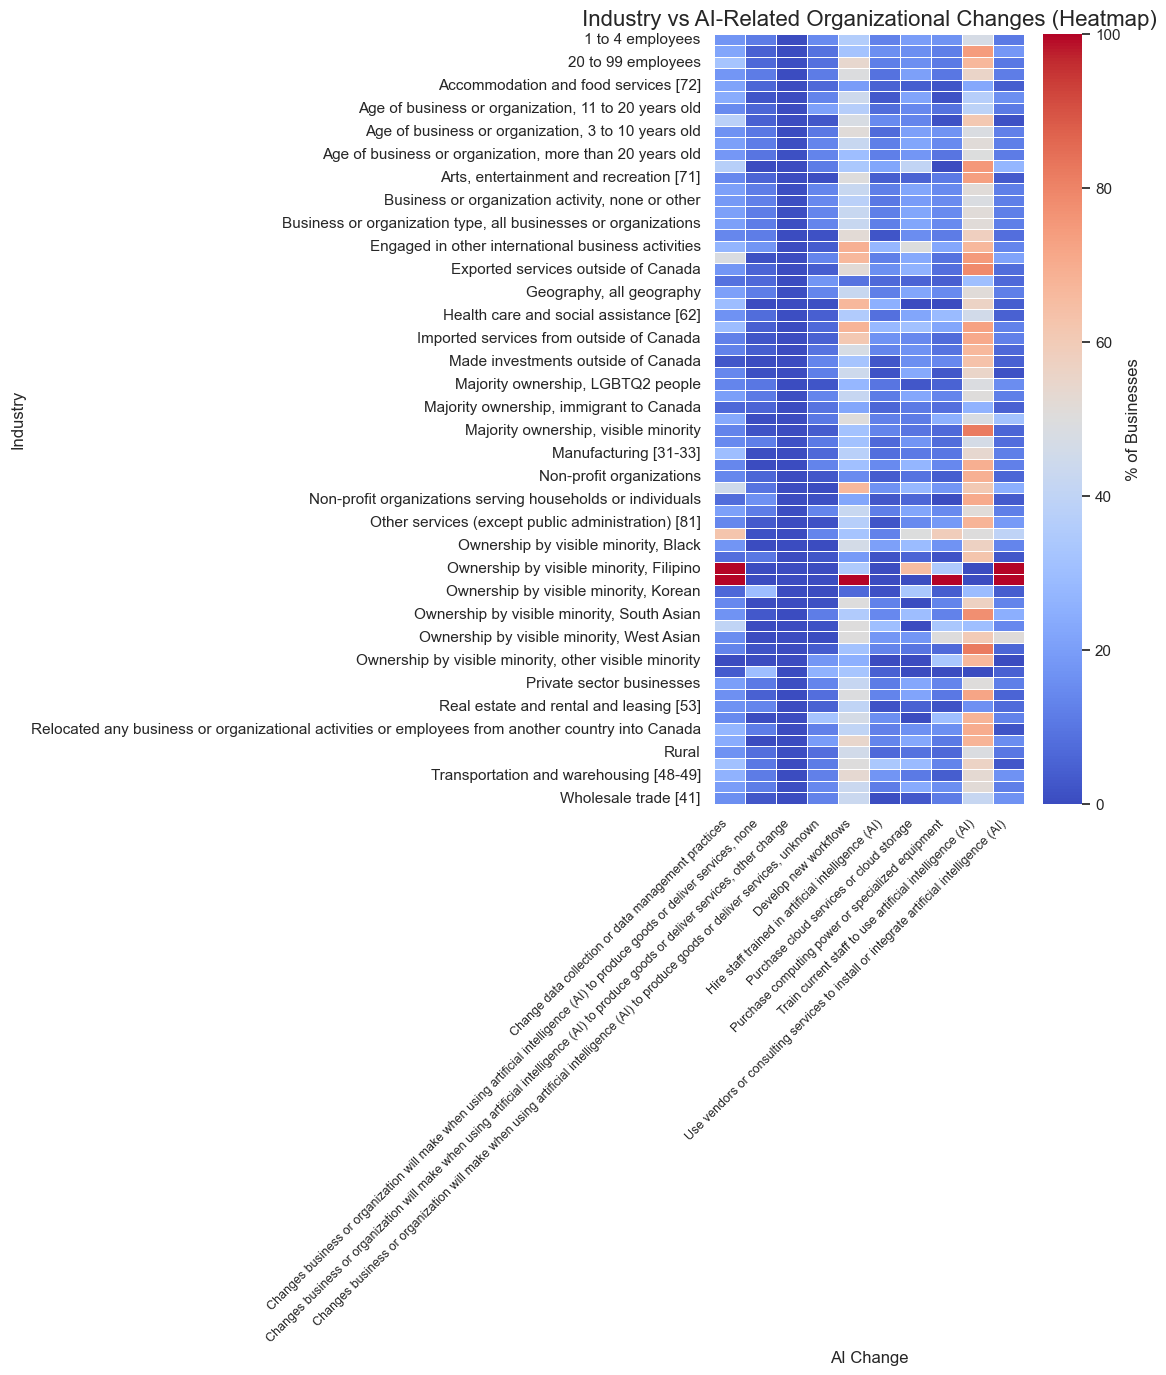

In [15]:
plt.figure(figsize=(5, 10))
sns.heatmap(
    pivot,
    annot=False,
    cmap="coolwarm",
    cbar_kws={'label': '% of Businesses'},
    linewidths= 0.7
)

plt.xticks(rotation = 45, ha="right", fontsize = 9)

plt.title("Industry vs AI-Related Organizational Changes (Heatmap)", fontsize = 16)
plt.xlabel("AI Change")
plt.ylabel("Industry")


plt.tight_layout()
plt.show()

#This heatmap shows how different industries are likely to apply differnt AI-related organizational changes.

## Discussion

When we look at the stats, there are some clear trends in how Canadian industries plan to use artificial intelligence in 2025. **Regarding the first question**, the bar chart makes it very obvious: Many of the **ownership groups** stand out, but also in general, most of the businesses are planning to train their current employees. We can assume that these organizations are betting on their own employees and have full confidence in them. It also suggests that these industries are focusing on getting everyone up to speed before AI starts to completely change the workplace.

To add on, industries such as **Retail Trade**, **Finance and Insurance**, and **Health Care** aren't really involved in AI training. Showing a rate of **35-45%** of businesses in those fields are getting their people ready. There can be several reasons for this, such as how they rely more on **external services** or even **cloud services** rather than a major overhaul. Additionally, they may also be early in their AI adoption process or it has not affected their daily work yet.

Furthermore, looking at the next question, the main changes businesses make for AI are relatively transparent: **They are building new workflows, updating how they manage data, and training their current staff.** These changes indicate that most industries view AI as something that requires improvements internally rather than purchasing expensive equipment or hiring AI experts. It is uncommon for a lot of companies to make big-ticket moves. Those moves most likely comes down to **cost, finding the right people, or a liking of forming AI skills gradually.**

The **heatmap** supported these findings by showing how each industry has its own priorities and how they tackle these changes differently. All in all, the analysis showcases that in Canada, **AI is mostly going to grow internally.** Most industries are focusing on **improving and modifying their processes**, **getting smarter with data** and making sure **their employees know how to utilize AI effectively.**



## GenAI Disclosure ##

In this project, there was a minimal use of AI. ChatGPT was used mainly to check if the Python code/syntax was correct and to help format and make the Seaborn heatmap. All analysis, coding and interpretation were done by me in the notebook enviroment. 

Examples of prompots I used:
- “Can you check if this syntax is correct?”
- “Why is my bar plot showing error bars and how can I remove them?”
- “How can I change the color scheme of a Seaborn heatmap?”

For the syntax part:
- Minimal debugging support
- Improving the formatting of the visualizations

## References ## 
- https://open.canada.ca/data/en/dataset/d7f8831d-f69c-43e7-bf02-f258bb7e5128

- https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax

- https://chatgpt.com/

- https://www.geeksforgeeks.org/data-analysis/data-analysis-with-python/




